In [21]:
import instructor
from pydantic import BaseModel, Field
from openai import OpenAI
from enum import Enum
from typing import List
import pandas as pd
import os

# Define the path to the data folder, going up one directory
data_folder = os.path.join('..', 'data')


## Language Detection

Kaggle source: https://www.kaggle.com/datasets/basilb2s/language-detection


In [22]:
client = instructor.patch(OpenAI())


In [23]:
# Define the data model for classification
class LanguageCategory(str, Enum):

    # 1) English
    # 2) Malayalam
    # 3) Hindi
    # 4) Tamil
    # 5) Kannada
    # 6) French
    # 7) Spanish
    # 8) Portuguese


    ENGLISH = "english"
    MALAYALAM = "malayalam"
    HINDI = "hindi"
    TAMIL = "tamil"
    KANNADA = "kannada"
    FRENCH = "french"
    SPANISH = "spanish"
    PORTUGUESE = "portuguese"

    # 9) Italian
    # 10) Russian
    # 11) Swedish
    # 12) Dutch
    # 13) Arabic
    # 14) Turkish
    # 15) German
    # 16) Danish
    # 17) Greek

    ITALIAN = "italian"
    RUSSIAN = "russian"
    SWEDISH = "swedish"
    DUTCH = "dutch"
    ARABIC = "arabic"
    TURKISH = "turkish"
    GERMAN = "german"
    DANISH = "danish"
    GREEK = "greek"

class LanguageClassification(BaseModel):
    category: LanguageCategory
    confidence: float = Field(ge=0, le=1, description="Confidence score for the classification")

    
    

In [24]:

SYSTEM_PROMPT = """
You are an AI assistant for a large customer support team. 

Your tasks:
1. Categorize the ticket into the most appropriate category.
2. In this case, you need to categorize the ticket into the most appropriate language.

Remember:
- Be objective and base your analysis solely on the information provided in the ticket.
- If you're unsure about any aspect, reflect that in your confidence score.

Analyze the following customer support ticket and provide the requested information in the specified format.
"""

def classify_ticket(ticket_text: str) -> LanguageClassification:
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        response_model=LanguageClassification,
        temperature=0,
        max_retries=3,
        messages=[
            {
                "role": "system",
                "content": SYSTEM_PROMPT,
            },
            {"role": "user", "content": ticket_text}
        ]
    )
    return response



In [25]:
language_detection = pd.read_csv(os.path.join(data_folder, 'Language Detection.csv'))  # Adjust the filename as needed


In [26]:
language_detection

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada


In [27]:
language_detection.Language.value_counts()


Language
English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: count, dtype: int64

In [28]:
# Load the language detection dataset
# Assuming language_detection is already defined
# language_detection = pd.read_csv('path_to_your_file.csv')  # Uncomment and adjust if needed

# Calculate the number of samples for each language based on the total count
total_samples = 100
language_counts = language_detection['Language'].value_counts()
proportions = language_counts / language_counts.sum()

# Calculate the number of samples for each language
samples_per_language = (proportions * total_samples).round().astype(int)

# Create an empty list to hold the sampled data
subsample_list = []

# Sample from each language class
for language, count in samples_per_language.items():
    if count > 0:  # Only sample if count is greater than 0
        sampled_data = language_detection[language_detection['Language'] == language].sample(n=count, random_state=42)
        subsample_list.append(sampled_data)

# Concatenate all sampled data into a single DataFrame
subsample = pd.concat(subsample_list)

# Shuffle the subsample to mix the classes
subsample = subsample.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the value counts of the subsample
print(subsample['Language'].value_counts())

Language
English       13
French        10
Spanish        8
Sweedish       7
Portugeese     7
Italian        7
Russian        7
Malayalam      6
Dutch          5
Tamil          5
Turkish        5
Arabic         5
German         5
Danish         4
Kannada        4
Greek          4
Hindi          1
Name: count, dtype: int64


In [29]:
subsample


,Text,Language
0,y dijo que quería casarse conmigo había venido...,Spanish
1,in deze video zal ik je 100 veelvoorkomende en...,Dutch
2,വിവരം (ഡാറ്റാ) ലഭ്യമല്ലെങ്കിൽ യന്ത്രപഠനം സാധ്യ...,Malayalam
3,"Первый документальный фильм о Википедии, озагл...",Russian
4,Macchine a vettori di supporto (Support Vector...,Italian
...,...,...
98,عمومًا، يقتصر الحظر الكامل من ويكيبيديا على حا...,Arabic
99,"« Aujourd'hui, nous sommes heureux d'annoncer ...",French
100,Åh gud.,Danish
101,В примере с энергией тяжелый обед делает меня ...,Russian


In [30]:
# Classify each entry in the subsample
subsample['Classification'] = subsample['Text'].apply(classify_ticket)

In [31]:
# Define a mapping function using the LanguageCategory enum
def map_language(classification):
    try:
        # Access the category attribute directly
        return classification.category.value.capitalize()  # Capitalize the first letter
    except Exception as e:
        print(f"Error processing classification: {classification}, Error: {e}")
    return None  # Return None if no match is found

# Create a new column 'Classified_Language' based on the mapping
subsample['Classified_Language'] = subsample['Classification'].apply(map_language)

# Display the updated DataFrame with the new column
print(subsample[['Text', 'Language', 'Classification', 'Classified_Language']].head())

                                                Text   Language  \
0  y dijo que quería casarse conmigo había venido...    Spanish   
1  in deze video zal ik je 100 veelvoorkomende en...      Dutch   
2  വിവരം (ഡാറ്റാ) ലഭ്യമല്ലെങ്കിൽ യന്ത്രപഠനം സാധ്യ...  Malayalam   
3  Первый документальный фильм о Википедии, озагл...    Russian   
4  Macchine a vettori di supporto (Support Vector...    Italian   

                                      Classification Classified_Language  
0  category=<LanguageCategory.SPANISH: 'spanish'>...             Spanish  
1  category=<LanguageCategory.DUTCH: 'dutch'> con...               Dutch  
2  category=<LanguageCategory.MALAYALAM: 'malayal...           Malayalam  
3  category=<LanguageCategory.RUSSIAN: 'russian'>...             Russian  
4  category=<LanguageCategory.ITALIAN: 'italian'>...             Italian  


In [32]:
subsample[['Text', 'Language', 'Classification', 'Classified_Language']].head()

,Text,Language,Classification,Classified_Language
0,y dijo que quería casarse conmigo había venido...,Spanish,category=<LanguageCategory.SPANISH: 'spanish'>...,Spanish
1,in deze video zal ik je 100 veelvoorkomende en...,Dutch,category=<LanguageCategory.DUTCH: 'dutch'> con...,Dutch
2,വിവരം (ഡാറ്റാ) ലഭ്യമല്ലെങ്കിൽ യന്ത്രപഠനം സാധ്യ...,Malayalam,category=<LanguageCategory.MALAYALAM: 'malayal...,Malayalam
3,"Первый документальный фильм о Википедии, озагл...",Russian,category=<LanguageCategory.RUSSIAN: 'russian'>...,Russian
4,Macchine a vettori di supporto (Support Vector...,Italian,category=<LanguageCategory.ITALIAN: 'italian'>...,Italian


Observations with confidence above 0.9: 4
Observations with confidence between 0.6 and 0.9: 99
Observations with confidence below 0.6: 0


Text(0, 0.5, 'Frequency')

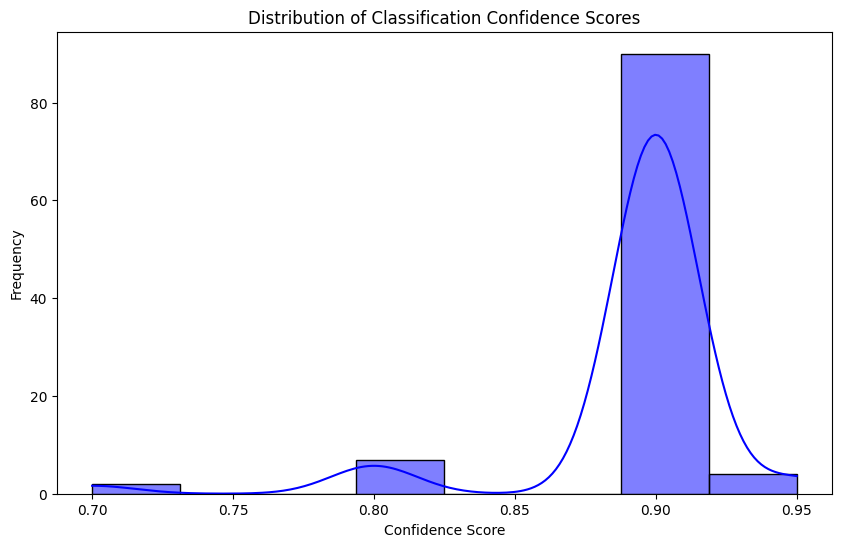

In [33]:
# Assuming 'Classification' is a column containing LanguageClassification objects
# Extract the confidence scores from the Classification column
confidence_scores = subsample['Classification'].apply(lambda x: x.confidence)

# Count observations based on confidence levels
above_0_9 = (confidence_scores > 0.9).sum()
between_0_6_and_0_9 = ((confidence_scores >= 0.6) & (confidence_scores <= 0.9)).sum()
below_0_6 = (confidence_scores < 0.6).sum()

# Print the results
print(f"Observations with confidence above 0.9: {above_0_9}")
print(f"Observations with confidence between 0.6 and 0.9: {between_0_6_and_0_9}")
print(f"Observations with confidence below 0.6: {below_0_6}")

# Plotting the distribution of confidence scores using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the distribution of confidence scores
sns.histplot(confidence_scores, kde=True, ax=ax, color='blue')

# Setting the title and labels
ax.set_title('Distribution of Classification Confidence Scores')
ax.set_xlabel('Confidence Score')
ax.set_ylabel('Frequency')

# Displaying the plot

In [34]:
print("Classification accuracy:", (subsample['Language'] == subsample['Classified_Language']).sum()/len(subsample))


Classification accuracy: 0.8446601941747572


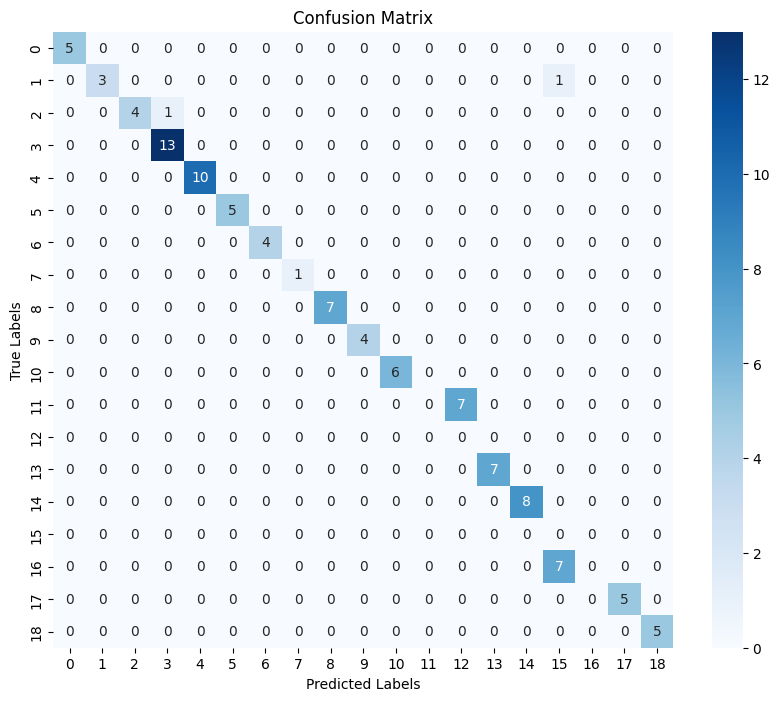

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a confusion matrix
cm = confusion_matrix(subsample['Language'], subsample['Classified_Language'])

# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()



We see that the LLM consistently mis-classifies Language 11 and Language 12. Which we know are Swedish and Dutch. They are indeed very similar languages, and this is a sign that to improve the language classification language we would have to most likely fine tune our model to better understand the differences between Swedish and Dutch.

### The beauty of meaningful error messages

In [19]:
# Define the data model for classification
class LanguageCategory(str, Enum):

    # 1) English
    # 2) Malayalam
    # 3) Hindi
    # 4) Tamil
    # 5) Kannada
    # 6) French
    # 7) Spanish
    # 8) Portuguese


    ENGLISSSH = "englisssh" # MISSPELLING PUT HERE ON PURPOSE
    MALAYALAM = "malayalam"
    HINDI = "hindi"
    TAMIL = "tamil"
    CACAANADA = "cacanada" # MISSPELLING PUT HERE ON PURPOSE
    FRENCH = "french"
    SPANISH = "spanish"
    PORTUGUESE = "portuguese"

    # 9) Italian
    # 10) Russian
    # 11) Swedish
    # 12) Dutch
    # 13) Arabic
    # 14) Turkish
    # 15) German
    # 16) Danish
    # 17) Greek

    ITALIAN = "spaghetti" # MISSPELLING PUT HERE ON PURPOSE
    RUSSIAN = "russian"
    SWEEDISH = "sweedish" # MISSPELLING PUT HERE ON PURPOSE
    DATCH = "datch" # MISSPELLING PUT HERE ON PURPOSE
    ARABIC = "arabic"
    TURKISH = "turkish"
    GERMAN = "german"
    DANISH = "danish"
    GREEKKK = "greekkk"# MISSPELLING PUT HERE ON PURPOSE

class LanguageClassification(BaseModel):
    category: LanguageCategory
    confidence: float = Field(ge=0, le=1, description="Confidence score for the classification")

In [20]:
SYSTEM_PROMPT = """
You are an AI assistant for a large customer support team. 

Your tasks:
1. Categorize the ticket into the most appropriate category.
2. In this case, you need to categorize the ticket into the most appropriate language.

Remember:
- Be objective and base your analysis solely on the information provided in the ticket.
- If you're unsure about any aspect, reflect that in your confidence score.

Analyze the following customer support ticket and provide the requested information in the specified format.
"""

def classify_ticket(ticket_text: str) -> LanguageClassification:
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        response_model=LanguageClassification,
        temperature=0,
        max_retries=3,
        messages=[
            {
                "role": "system",
                "content": SYSTEM_PROMPT,
            },
            {"role": "user", "content": ticket_text}
        ]
    )
    return response

In [21]:
language_detection = pd.read_csv(os.path.join(data_folder, 'Language Detection.csv'))  # Adjust the filename as needed


In [22]:

# Load the language detection dataset
# Assuming language_detection is already defined
# language_detection = pd.read_csv('path_to_your_file.csv')  # Uncomment and adjust if needed

# Calculate the number of samples for each language based on the total count
total_samples = 1000
language_counts = language_detection['Language'].value_counts()
proportions = language_counts / language_counts.sum()

# Calculate the number of samples for each language
samples_per_language = (proportions * total_samples).round().astype(int)

# Create an empty list to hold the sampled data
subsample_list = []

# Sample from each language class
for language, count in samples_per_language.items():
    if count > 0:  # Only sample if count is greater than 0
        sampled_data = language_detection[language_detection['Language'] == language].sample(n=count, random_state=42)
        subsample_list.append(sampled_data)

# Concatenate all sampled data into a single DataFrame
subsample = pd.concat(subsample_list)

# Shuffle the subsample to mix the classes
subsample = subsample.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the value counts of the subsample
print(subsample['Language'].value_counts())

Language
English       134
French         98
Spanish        79
Portugeese     71
Italian        68
Russian        67
Sweedish       65
Malayalam      57
Dutch          53
Arabic         52
Turkish        46
German         45
Tamil          45
Danish         41
Kannada        36
Greek          35
Hindi           6
Name: count, dtype: int64


In [23]:
# Classify each entry in the subsample
subsample['Classification'] = subsample['Text'].apply(classify_ticket)

InstructorRetryException: 1 validation error for LanguageClassification
category
  Input should be 'englisssh', 'malayalam', 'hindi', 'tamil', 'cacanada', 'french', 'spanish', 'portuguese', 'spaghetti', 'russian', 'sweedish', 'datch', 'arabic', 'turkish', 'german', 'danish' or 'greekkk' [type=enum, input_value='italian', input_type=str]
    For further information visit https://errors.pydantic.dev/2.9/v/enum

This is a great error, we see that the LLM categorized the language italian, which clearly is not spaghetti.

